In [24]:
from tensorflow.keras.datasets.mnist import load_data
import numpy as np

mnist = load_data()
(x_train, y_train), (x_test, y_test) = mnist

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
for i in x_train[:8]:
    print(i)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

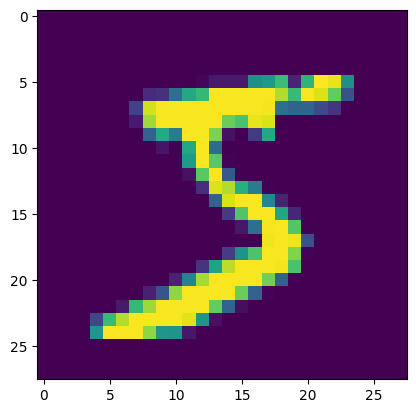

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [26]:
import tensorflow as tf
batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10 # 출력 클래스의 개수
epochs = 20 # 에포크의 개수
# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 입력 이미지를 2차원에서 1차원 벡터로 변경한다. 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [27]:
# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다. 
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다.
y_train = tf.keras.utils.to_categorical(y_train, num_classes) #원핫인코딩 형태로 변환
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
# 신경망의 모델을 구축한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.summary()
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다. 
model.compile(loss='mean_squared_error',
optimizer=sgd,
metrics=['accuracy'])

# 학습을 수행한다. 
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs)

# 학습을 평가한다. 
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0730 - accuracy: 0.5211
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0406 - accuracy: 0.7865
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0279 - accuracy: 0.8557
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0228 - accuracy: 0.8755
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0202 - accuracy: 0.8853
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0185 - accuracy: 0.8919
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0173 - accuracy: 0.8975
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0165 - accuracy: 0.9016
Epoch 9/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0158 - accuracy: 0.9056
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0152 - accuracy: 0.9082

In [29]:
# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다. 
model.compile(loss='categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy'])

# 학습을 수행한다. 
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs)

# 학습을 평가한다. 
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2604 - accuracy: 0.9292
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2040 - accuracy: 0.9438
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1686 - accuracy: 0.9535
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1436 - accuracy: 0.9605
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1252 - accuracy: 0.9656
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1105 - accuracy: 0.9700
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0991 - accuracy: 0.9731
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0896 - accuracy: 0.9758
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0818 - accuracy: 0.9776
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0749 - accuracy: 0.9797